In [154]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Import and preprocess data from csv

In [120]:
raw_df = pd.read_csv("metadata - Kopi.csv")
raw_df.head()

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True


In [121]:
COI = ["diagnostic", "age", "itch", "grew", "hurt", "changed", "bleed", "elevation", "biopsed"]
df = raw_df.loc[:,COI]
df = df.dropna()


In [122]:
COIbool = ["itch", "grew", "hurt", "changed", "bleed", "elevation", "biopsed"]
d = {"False": 0, "True": 1, False: 0, True:1, "UNK": None}
for col in COIbool:
    df[col] = df[col].replace(d)
df = df.dropna()
df

,diagnostic,age,itch,grew,hurt,changed,bleed,elevation,biopsed
0,NEV,8,0.0,0.0,0.0,0.0,0.0,0.0,0
1,BCC,55,1.0,1.0,0.0,1.0,1.0,1.0,1
2,ACK,77,1.0,0.0,0.0,0.0,0.0,0.0,0
3,ACK,75,1.0,0.0,0.0,0.0,0.0,0.0,0
4,BCC,79,1.0,1.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...
2293,ACK,73,1.0,0.0,0.0,0.0,0.0,0.0,0
2294,BCC,55,1.0,1.0,0.0,1.0,0.0,0.0,1
2295,SEK,74,0.0,0.0,0.0,0.0,0.0,0.0,0
2296,BCC,58,1.0,0.0,0.0,0.0,0.0,1.0,1


In [123]:
y = df["diagnostic"]
X = df.drop("diagnostic",axis=1)

In [124]:
cancers = {"BCC":1, "MEL":1, "SCC": 1, "ACK": 0, "NEV":0, "SEK":0}
y = y.replace(cancers)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, train_size=0.75)

In [164]:
from sklearn.metrics import accuracy_score, roc_auc_score

n_vals = [i for i in range(3,51)]
knn_classifiers = []

for i in n_vals:
    knnc = KNeighborsClassifier(n_neighbors=i)
    knnc.fit(X_train, y_train)
    knn_classifiers.append(knnc)

predicted_ys = [model.predict(X_test) for model in knn_classifiers]
accuracy_scores = [accuracy_score(y_test, y_pred) for y_pred in predicted_ys]
roc_auc_scores = [roc_auc_score(y_test,y_pred) for y_pred in predicted_ys]

for i, val in enumerate(n_vals):
    print(f"N = {val} \t Accuracy scores = {accuracy_scores[i]} \t ROC AUC Scores = {roc_auc_scores[i]}")


N = 3 	 Accuracy scores = 0.8734177215189873 	 ROC AUC Scores = 0.8670399648660518
N = 4 	 Accuracy scores = 0.8628691983122363 	 ROC AUC Scores = 0.8472771190162495
N = 5 	 Accuracy scores = 0.8713080168776371 	 ROC AUC Scores = 0.8652283706631533
N = 6 	 Accuracy scores = 0.8713080168776371 	 ROC AUC Scores = 0.8595191040843214
N = 7 	 Accuracy scores = 0.8755274261603375 	 ROC AUC Scores = 0.8674242424242424
N = 8 	 Accuracy scores = 0.8670886075949367 	 ROC AUC Scores = 0.8558959156785244
N = 9 	 Accuracy scores = 0.8734177215189873 	 ROC AUC Scores = 0.865612648221344
N = 10 	 Accuracy scores = 0.8586497890295358 	 ROC AUC Scores = 0.8443675889328063
N = 11 	 Accuracy scores = 0.8776371308016878 	 ROC AUC Scores = 0.8670948616600791
N = 12 	 Accuracy scores = 0.8755274261603375 	 ROC AUC Scores = 0.8631422924901184
N = 13 	 Accuracy scores = 0.869198312236287 	 ROC AUC Scores = 0.856280193236715
N = 14 	 Accuracy scores = 0.8628691983122363 	 ROC AUC Scores = 0.8472771190162495
N 

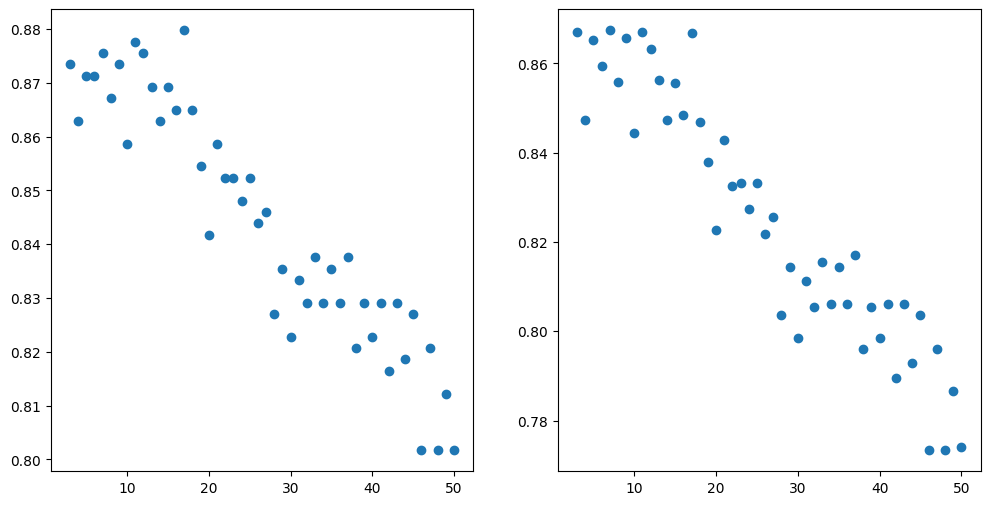

In [170]:
fig, ax = plt.subplots(ncols = 2, figsize=(12,6))
ax[0].scatter(n_vals,accuracy_scores)
ax[1].scatter(n_vals, roc_auc_scores)